Testování hypotéz
============

Z předchozího měření (nebo teorie) činíme hypotézu o hodnotě neznámého parametru $\theta_0$ (**odhad** $\hat\theta_0 \pm \delta$ s pravděp. obsahem *p*)
, ev. o rozdělení měřených hodnot. Následující měření umožní **test** hypotézy *H0*:

měření dává statistiku $t(y_1,y_2,..,y_N)$, úkolem je stanovit, jaká je pravděpodobnost 
pozorování $t$ za předpokladu platnosti/neplatnosti *H0* 

určujeme tedy, s jakym rizikem nastane jedna ze 2 možných chyb

- chyba 1. druhu = hypotéza platí, ale _H0_ zamítneme: $P(t \in K | H_0)=\alpha$
- chyba 2. druhu = hypotéza neplatí, ale _H0_ přijmeme: $P(t \notin K | \mathrm{not} H_0)=\beta$ 

kde *K* je kritická oblast "nepřijatelných" hodnot $t$ (pokud $t$ zde leží, můžeme *H0* **zamítnout na hladině významnosti** $\alpha$ - jinak je naše statistika nedostatečná a vyžaduje další měření). Pravděpodobnost $1-\beta$ je pak **síla (mohutnost) testu** (závisí na $\alpha$)...

> pokud _H0_ neplatí (platí alternativa _H1_, pokud je jediná)


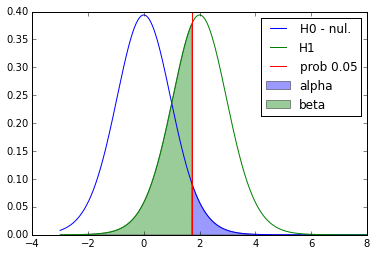

In [6]:
%matplotlib inline
M,N=12,10 #velikosti vzorků
mu=2.
sig=1
from matplotlib.pyplot import *
from scipy import stats
from numpy import r_
x=r_[-3:8:0.01]
hyp0=stats.t(M+N-2,loc=0)
hyp1=stats.t(M+N-2,loc=mu)
y1=hyp0.pdf(x)
y2=hyp1.pdf(x)
plot(x,y1)
plot(x,y2)
prob=0.05
pos=hyp0.ppf(1-prob) # hodnoty mensi nez tato 
axvline(pos,color='r')
fill([pos]+list(x[x>pos]),[0]+list(y1[x>pos]),'b',alpha=0.4,hold=1)
fill(list(x[x<pos])+[pos],list(y2[x<pos])+[0],'g',alpha=0.4,hold=1)
legend(["H0 - nul.","H1","prob %.2f"%prob,"alpha","beta"])

### Neyman-Pearsonův test

Volba kritické oblasti podle poměru $f_N(X|\theta_1)/f_N(X|\theta_0) \gt c_\alpha$, hodnota $c_\alpha$ zvolena podle dané hladiny významnosti; v principu jde o poměr věrohodností.



In [4]:
import numpy as np
-np.log(0.1)*0.1+2.4
np.log(0.05)/np.log(0.6)

5.8644910008005713

## Test dobré shody

určení stupně shody získaných dat s hypotézou o jejich rozdělení


### Pearsonův test

z naměřených hodnot sestavíme histogram o *K* buňkách, do každé z nich padne $n_i$ z měřených hodnot ($\sum n_i = N$). Hypotéza H0 stanoví distrib. funkci rozdělení F, tedy pro každou buňku pravděpodobnost $p_i=P[x \in \lt l_i,m_i)]=F(m_i)-F(l_i)$, kde $l_i, m_i$ jsou hranice i-té buňky (obvykle $l_i=m_{i-1}$). Náhodné proměnné $n_i$ mají binomické rozdělení a očekávanou hodnotu $E(n_i)=N p_i$.

**Pearsonova statistika**

$$T=\sum_i^k \frac{(n_i-N p_i)^2}{N p_i} =  \frac{1}{N} \sum_i^k \left( \frac{n_i^2}{p_i} - 2 n_iN + N^2 p_i \right) = \frac{1}{N} \sum_i^k \frac{n_i^2}{p_i} - N$$

v limitě $N \to \infty$ (kdy rozdělení $n_i$ se blíží normálnímu) má $T$ rozdělení $\chi_{K-1}^2$ (Pearsonova věta).

Podmínkou je malé množství buňek, kde není dostatečné množství měřených hodnot (lze řešit úpravou mezí buňek / slučováním tak, aby $p_i$ byly vyrovnané).

Rozdělení může být závislé na parametrech $\theta_1, ..., \theta_r$ - pak hledáme hodnotu $\mathbf{\theta}$ dávající nejlepší shodu, testovaná statistika má rozdělení s méně stupni volnosti, někde mezi $\chi_{K-1}^2$ a $\chi_{K-r-1}^2$ (rozdíl je malý, pokud $K \gg r$).


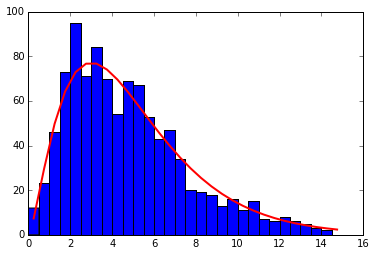

In [50]:
from scipy import stats
import numpy as np
%matplotlib inline
from matplotlib import pyplot as pl

N=1000
dx=0.5
dset=stats.chi2(5).rvs(N)
x=np.r_[0:15:dx]
ok=pl.hist(dset,x)
pred=stats.chi2(5).pdf(x+0.25)
pl.plot(x+0.25,pred*N*dx,'r',lw=2)

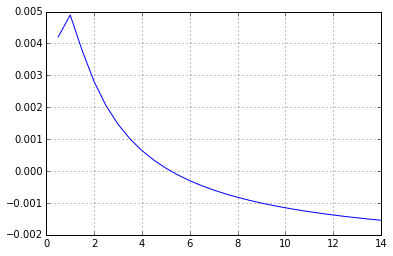

In [56]:
cumpred=stats.chi2(5).cdf(x)
pred2=cumpred[1:]-cumpred[:-1]
pl.plot(x[1:-1],pred[1:-1]*dx/pred2[1:]-1)
pl.grid()

(31.590190917491448, array([ 37.91592254,  41.33713815,  48.27823577]))

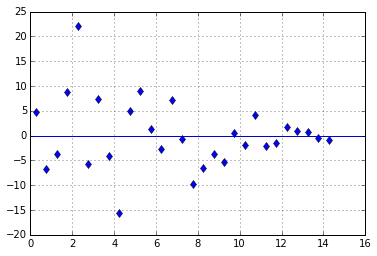

In [57]:
resid=ok[0]-pred[:-1]*N*dx
pl.plot(x[:-1]+dx/2.,resid,'d')
pl.axhline(0)
pl.grid()
sum(resid**2./(pred[:-1]*N*dx)),stats.chi2(len(ok[0])-1).isf([0.1,0.05,0.01])

In [20]:
def testN(ndf,dat,dx=0.5):
    pred=stats.chi2(ndf).pdf(x[:len(dat)]+dx/2.)
    return sum((dat-pred*sum(dat)*dx)**2./(pred*sum(dat)*dx))
testN(4,ok[0]),testN(6,ok[0])

(155.49945566272714, 149.73151462190449)

nulovou hypotézu (teor. křivka a histogram se neliší) nemůžeme zamítnout ani na *hladině spolehlivosti* 90%.

### Kolgomorův test

sestavení distribuční funkce z *N* naměřených dat $S_N(X)$ = (počet měření<x) / *N*.

statistika $D_N=\max \|S_N(x)-F(x)\|$ pro velká *N* (>80) má rozdělení 

$$F_{Klg}(\sqrt{N}D_N)=1-2 \sum_j^\infty (-1)^{j-1} \exp(-2j^2 N D_N^2)$$

H0 zamítáme s rizikem $\alpha$, pokud vyšlo $\sqrt{N}D_N > z_\alpha$

$\alpha$|$z_\alpha$ <br/>(Kolgomorov-Smirnovo rozdělení)
-|-
0.01 | 1.63
0.05 | 1.36
0.10 | 1.22




(0.020252210725574704, 0.64043113546507324)

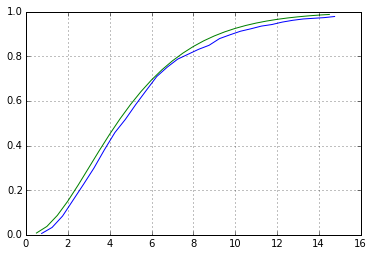

In [46]:
edf=np.cumsum(ok[0])
edf/=float(N)
pred=stats.chi2(5).cdf(x[1:])
pl.plot(x[1:]+0.25,edf,x[1:],pred)
pl.grid()
Dn=max(abs(edf-pred))
Dn,Dn*np.sqrt(N)

(0.72901387077572011, 0.25713257574053389)

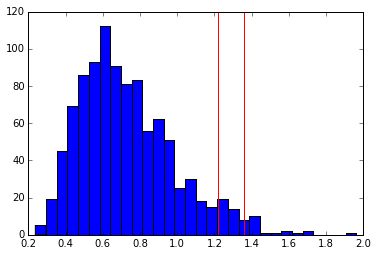

In [48]:
multest=np.array([max(abs(np.cumsum(np.histogram(stats.chi2(5).rvs(N),x)[0])/float(N)-pred)) for i in range(1000)])
multest*=np.sqrt(N)
pl.hist(multest,30)
pl.axvline(1.22,color='r')
pl.axvline(1.36,color='r')
multest.mean(),multest.std()

In [49]:
sum(multest>1.22)/1000.,sum(multest>1.36)/1000.,


(0.056000000000000001, 0.021999999999999999)

Test homogenity
============

## rovnost rozdělení 2 vzorků dat

### Smirnovův test

srovnáváme empirické dist. funkce $S_n$, $S_m$: statistika 
$D_{nm}=\max \|S_n(x)-S_m(x)\|$ má asymptotické rozdělení jako v předchozím případě se 
$\sqrt{nm/(n+m)}D_{nm} < z_\alpha$  

nebo jednostranné testy $D_{nm}^{\pm}=\max \{\pm (S_n(x)-S_m(x))\}$
má jednodušší rozdělení
$K^\pm(z)=\lim P(\sqrt{nm/(n+m)}D_{nm}^{\pm} \lt z_\alpha)=1-\exp(-2 z^2)$
pro $n\rightarrow\infty, m\rightarrow\infty$

úpravou vzniká

### Wayneův test

$$W_{nm}=\sqrt{nm/(n+m)}\ \max \{ \|S_n(x)-S_m(x)\|/S_m(x) \}$$ pro $x$ splňující $S(x)\geq a$ (kde $a>0$ je konstanta) má rozdělení

$$\lim P(W_{nm}^{\pm} \lt z_\alpha)=\sqrt{\frac{2}{\pi}} \int_0^{z\sqrt{a/(1-a)}} \exp\left(\frac{t^2}{2}\right) dt$$ pro $z \gt 0$.

-------------------------

### Wilcoxonův (-Mann-Whitney)  test

2 vzorky spojíme, (n+m) čísel uspořádáme podle velikosti a určíme pořadí (pozice) čísel $x_1, .., x_n$ z první sady: jejich součet je $T_n$ a výraz
$$U_0=\frac{\frac{nm + n(n+1)}{2}-T_n}{\sqrt{\frac{nm}{12}(n+m+1)}}$$ má rozdělení N(0,1).

-------------------


## rovnost středních hodnot
předpokládáme normální rozdělení N($\mu_x,\sigma_x^2$), N($\mu_y,\sigma_y^2$)

hypotéza H0: $\mu_x=\mu_y$

### Studentův test

testovací statistika
$$t=\frac{\bar{x}-\bar{y}}{\sqrt{\frac{\left((n-1)\widehat{\sigma_x^2} + (m-1)\widehat{\sigma_y^2}\right)(n+m)}{nm(n+m-2)}}}$$

kde $\bar{x}=\sum_i{x_i}/n$, $\widehat{\sigma_x^2}=\sum_i{(x_i-\bar{x})^2}/(n-1)$ (resp. pro *y* a *m*)
má Studentovo rozdělení s *n+m-2* stupni volnosti.

Pozn.: Disperze rozdílu $\Delta = \bar{x} -\bar{y}$ je odhadnuta jako $$\widehat{\sigma_{\Delta}^2} = \widehat{\sigma_{\bar{x}}^2} + \widehat{\sigma_{\bar{y}}^2} = \frac{n+m}{nm} \widehat{\sigma^2},$$ kde $$\widehat{\sigma^2} = \frac{(n-1)\widehat{\sigma_x^2} + (m-1)\widehat{\sigma_y^2}}{n+m-2}$$ je společný odhad kombinující odhady disperze vzorků $\widehat{\sigma_x^2}$ a $\widehat{\sigma_y^2}$.


## rovnost disperzí

### Fischerův test

hypotéza H0: $\sigma_x=\sigma_y$

statistika $F=\widehat{\sigma_x^2}/\widehat{\sigma_y^2}$ (definice viz výše) má [Fischer-Snedecorovo](mmzm_rozdeleni.ipynb/#fischer-snedecorovo_rozd+len+) rozdělení $F_{n-1,m-1}$     

In [7]:
from numpy import random
N,M=20,30
samp1=np.random.normal(3,1.,size=N)
samp2=np.random.normal(3,1.4,size=M)
sig1=sum((samp1-samp1.mean())**2)/(N-1)
sig2=sum((samp2-samp2.mean())**2)/(M-1)
sig1,sig2

(1.3693434492264385, 2.0942743714793242)

In [10]:
stats.f(N-1,M-1).isf([0.1,0.05,0.025,0.01]),1/stats.f(M-1,N-1).ppf([0.1,0.05,0.025,0.01]),sig1/sig2

(array([ 1.68490635,  1.95814552,  2.23127383,  2.59874401]),
 array([ 1.68490635,  1.95814552,  2.23127383,  2.59874401]),
 0.65385102729361144)